In [ ]:
"""Write a python program in python program for creating a Back Propagation Feed-forward neural network"""

1.Initialize the Neural Network
2.Initialize the neural network with the specified input size, hidden layer size, and output size.
3.Initialize weights and biases for both the input-hidden and hidden-output layers randomly.
4.Define Activation Functions
5.Define the sigmoid activation function and its derivative for later use.
6.Forward Pass
7.Perform the forward pass to compute the output of the neural network given input data.
8.Calculate the weighted sum of inputs to the hidden layer.
9.Apply the sigmoid activation function to the hidden layer inputs to get hidden layer outputs.
10.Calculate the weighted sum of inputs to the output layer.
11.Apply the sigmoid activation function to the output layer inputs to get final outputs.
12.Backward Pass (Backpropagation)
13.Compute the error between the predicted outputs and the actual targets.
14.Calculate the derivative of the error with respect to the output layer outputs.
15.Compute the error in the hidden layer by backpropagating the error from the output layer.
16.Calculate the derivative of the error with respect to the hidden layer outputs.
17.Update the weights and biases of both layers using the calculated gradients and the learning rate.
18.Training the Neural Network
19.Iterate over the dataset for a fixed number of epochs.
20.For each epoch, perform the forward pass followed by the backward pass to update weights and biases.
21.Optionally, monitor and print the loss (mean squared error) to track the training progress.
22.Testing the Trained Model
23.Use the trained neural network to make predictions on new data.
24.Perform a forward pass using the trained weights and biases to get the predicted outputs.

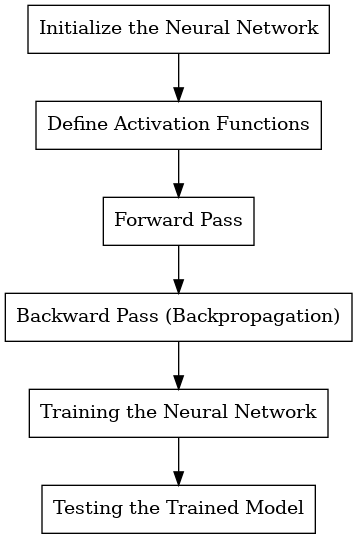

In [12]:
from PIL import Image 
image = Image.open('backpropffnn.png')
image

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

2024-04-19 11:56:01.696520: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-19 11:56:03.300856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
import numpy as np


class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.biases_input_hidden = np.zeros((1, self.hidden_size))

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.biases_hidden_output = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, inputs):
        # Forward pass
        self.hidden_inputs = (
            np.dot(inputs, self.weights_input_hidden) + self.biases_input_hidden
        )
        self.hidden_outputs = self.sigmoid(self.hidden_inputs)

        final_inputs = (
            np.dot(self.hidden_outputs, self.weights_hidden_output)
            + self.biases_hidden_output
        )
        final_outputs = self.sigmoid(final_inputs)

        return final_outputs

    def backward(self, inputs, targets, outputs, learning_rate):
        # Backward pass
        output_errors = targets - outputs
        output_delta = output_errors * self.sigmoid_derivative(outputs)

        hidden_errors = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_errors * self.sigmoid_derivative(self.hidden_outputs)

        # Update weights and biases
        self.weights_hidden_output += learning_rate * np.dot(
            self.hidden_outputs.T, output_delta
        )
        self.biases_hidden_output += learning_rate * np.sum(
            output_delta, axis=0, keepdims=True
        )

        self.weights_input_hidden += learning_rate * np.dot(inputs.T, hidden_delta)
        self.biases_input_hidden += learning_rate * np.sum(
            hidden_delta, axis=0, keepdims=True
        )

    def train(self, inputs, targets, learning_rate, epochs):
        for epoch in range(epochs):
            # Forward pass
            outputs = self.forward(inputs)

            # Backward pass
            self.backward(inputs, targets, outputs, learning_rate)

            # Print the mean squared error every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.square(targets - outputs))
                print(f"Epoch {epoch}, Loss: {loss}")


# Example usage
input_size = 2
hidden_size = 3
output_size = 1

# Create a neural network
model = NeuralNetwork(input_size, hidden_size, output_size)

# Sample inputs and targets
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

# Train the neural network
learning_rate = 0.1
epochs = 10000
model.train(inputs, targets, learning_rate, epochs)

# Test the trained model
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = model.forward(test_inputs)
print("Predictions after training:")
print(predictions)

Epoch 0, Loss: 0.29985469041178264
Epoch 100, Loss: 0.2502133050173472
Epoch 200, Loss: 0.24997146830731232
Epoch 300, Loss: 0.24974687512869942
Epoch 400, Loss: 0.24950848734891212
Epoch 500, Loss: 0.24924214682625528
Epoch 600, Loss: 0.24893153840327212
Epoch 700, Loss: 0.24855642939833517
Epoch 800, Loss: 0.24809059725175528
Epoch 900, Loss: 0.2474993829288955
Epoch 1000, Loss: 0.2467369823021864
Epoch 1100, Loss: 0.2457438611721199
Epoch 1200, Loss: 0.24444498220380342
Epoch 1300, Loss: 0.24274961249184177
Epoch 1400, Loss: 0.24055302312900498
Epoch 1500, Loss: 0.23773956638273047
Epoch 1600, Loss: 0.23418663874758983
Epoch 1700, Loss: 0.22977131533536777
Epoch 1800, Loss: 0.22438489619275037
Epoch 1900, Loss: 0.21796015591888074
Epoch 2000, Loss: 0.21050604213250065
Epoch 2100, Loss: 0.2021275955200441
Epoch 2200, Loss: 0.1930033128246528
Epoch 2300, Loss: 0.18331695624591654
Epoch 2400, Loss: 0.17318021629977076
Epoch 2500, Loss: 0.16259501805980514
Epoch 2600, Loss: 0.1514813330